### Tugas

Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 
Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
Menggunakan data spam.csv
Fitur CountVectorizer dengan mengaktifkan stop_words
Evaluasi hasilnya
Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
Menggunakan data spam.csv
Fitur TF-IDF dengan mengaktifkan stop_words
Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Import data voice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Mengubah male dan female menjadi angka 0 dan 1

In [3]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

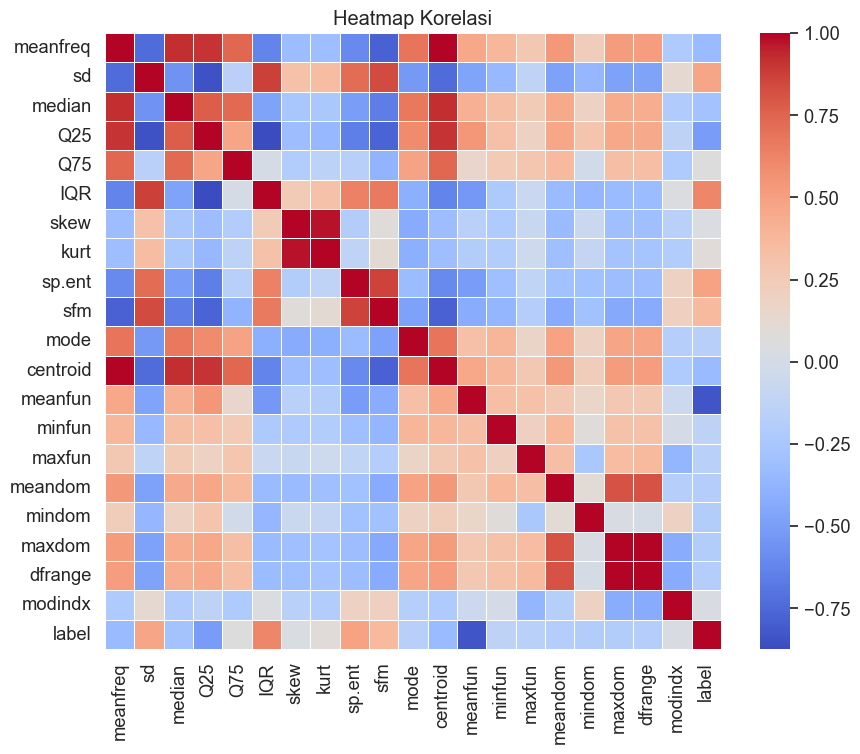

In [4]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".2f",
            cbar=True, 
            square=True) 

plt.title('Heatmap Korelasi') 
plt.show()

In [5]:
df.drop(['dfrange', 'centroid'], axis=1, inplace=True)

In [6]:
X = df[df.columns.difference(['label'])]
y = df['label']

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

Text(0, 0.5, 'No. of persons')

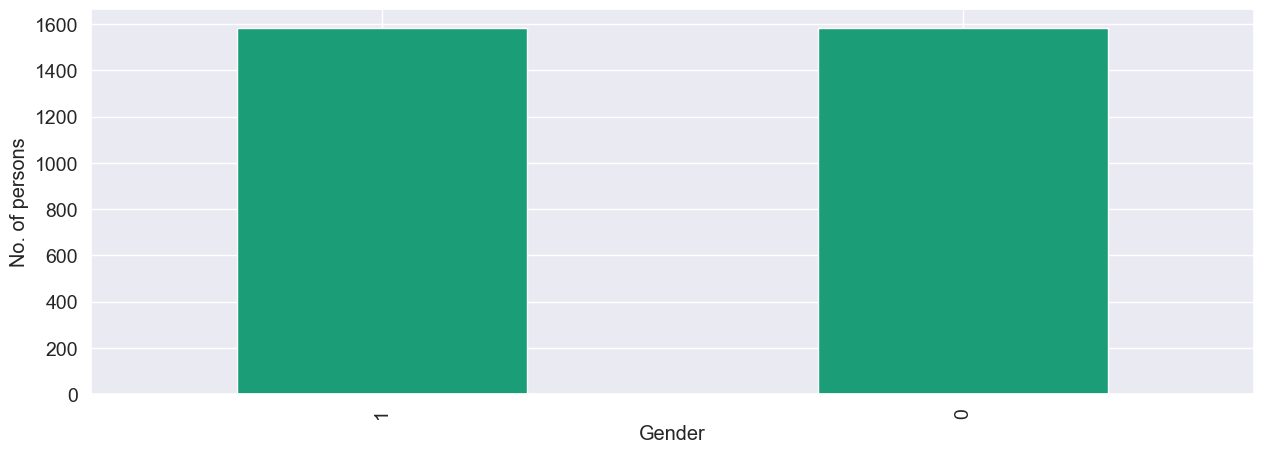

In [8]:
df['label'].value_counts().plot(kind='bar',figsize = (15,5),fontsize = 14,colormap='Dark2')
plt.xlabel('Gender')
plt.ylabel('No. of persons')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Import SVM

In [10]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()


In [11]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {int(acc * 100)}%')

Accuracy Score : 98%


Akurasi yang didapatkan mencapai 98%.

Question 2

In [13]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859–1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df = df.drop(df.iloc[:, 2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}

df = df.rename(columns=cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
labels = {
    'spam' : 1,
    'ham' : 0
}

df['Labels'] = df['Labels'].map(labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
X = df['SMS'].values
y = df['Labels'].values

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(decode_error='ignore', stop_words='english')
X = cv.fit_transform(X)

Bagi data menjadi 2 bagian dengan train 70% dan test 30%

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

import dan fit data menggunakan model MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  99.51282051282051
test accuracy is -->  97.54784688995215


TfidVectorizer dengan stop_words

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english')

In [22]:
X = df['SMS'].values
y = df['Labels'].values

In [23]:
X = cv.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [25]:
model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  98.17948717948718
test accuracy is -->  96.11244019138756
